In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
import numpy as np

rcParams['figure.figsize'] = [16., 10.]

In [3]:
import utils

all_participants = []

for i in range(1, 11):
    i_str = str(i).zfill(2)
    array = [np.load(f'../datasets/topicos_cc/s{i_str}_1.npy'), np.load(f'../datasets/topicos_cc/s{i_str}_2.npy'), np.load(f'../datasets/topicos_cc/s{i_str}_3.npy')]
    np_array = np.array(array)
    all_participants.append(np_array)
    np.save(f'../datasets/topicos_cc/s{i_str}.npy', np_array)

all_participants = np.array(all_participants)
np.save('../datasets/topicos_cc/s_t.npy', all_participants)

In [4]:
all_participants.shape

(10, 3, 8, 1600, 4)

In [5]:
all_participants = all_participants.swapaxes(4, 3)
all_participants = all_participants.swapaxes(1, 2)
all_participants.shape

(10, 8, 3, 4, 1600)

In [6]:
for i in range(len(all_participants)):
    all_participants[i] = utils.filter_data(all_participants[i])

In [7]:
def compareTrial2d(d1, d2):
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(0, 8, 1600)
    ax[0].plot(x, d1[0])
    ax[0].plot(x, d1[1])
    ax[0].plot(x, d1[2])
    ax[0].plot(x, d1[3])

    ax[1].plot(x, d2[0])
    ax[1].plot(x, d2[1])
    ax[1].plot(x, d2[2])
    ax[1].plot(x, d2[3])

    plt.show()

In [8]:
def compareTrial3d(participants, movs, trials):
    for z, trial in enumerate(trials):
        plot_data = []
        participant = participants[z]
        mov = movs[z]
        for channel in range(4):
            for i, t in enumerate(np.linspace(0, 8, 1600)):
                plot_data.append([channel, t, participant[mov][trial][channel][i]])

        plot_data = np.array(plot_data)
        x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
        ax = plt.axes(projection ='3d')
        ax.set_title('Movimento {}'.format(mov + 1))
        ax.set_xlabel('Canais')
        ax.set_ylabel('Tempo (s)')
        ax.set_zlabel('Potência (mV)')
        ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
        plt.show()

Comparando classe 0 do trial 1 e 2 do participante 1


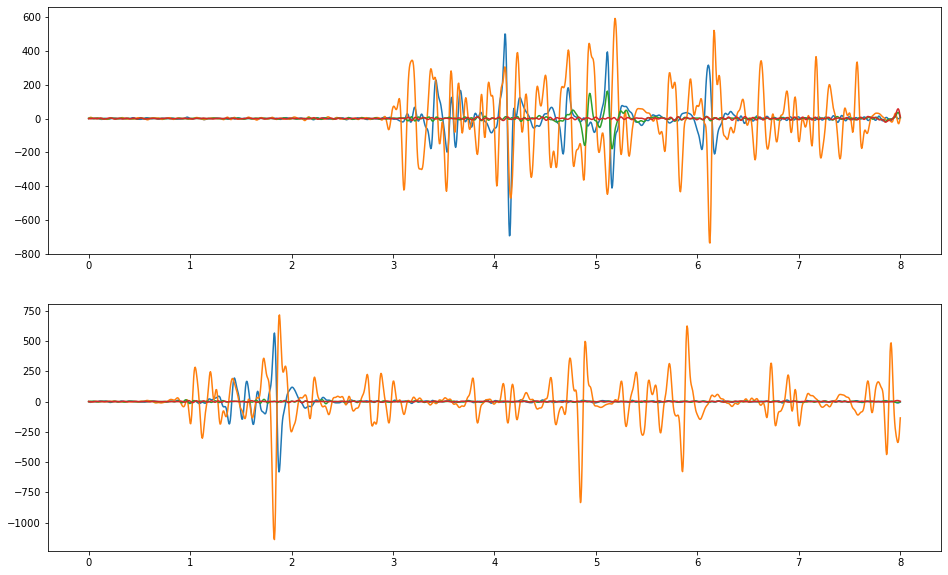

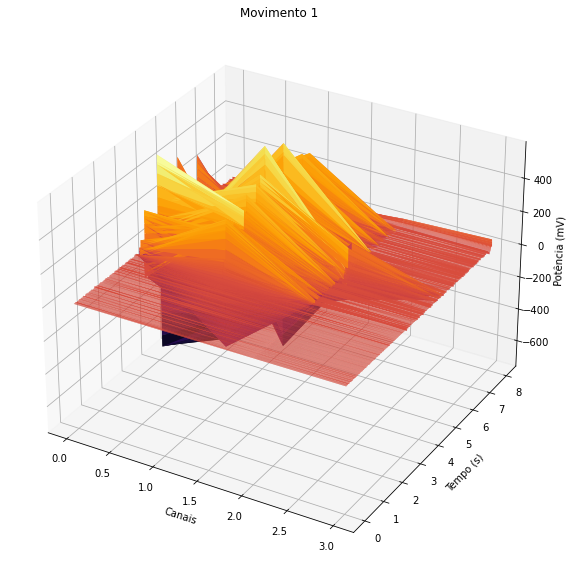

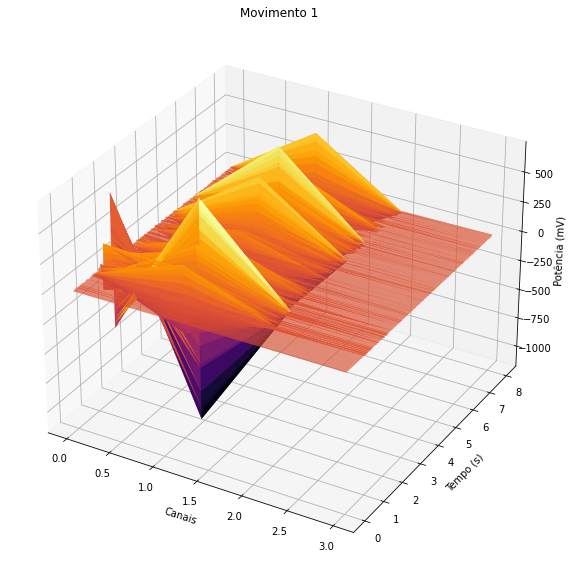

In [9]:
print(f"Comparando classe 0 do trial 1 e 2 do participante 1")
d1 = all_participants[0][0,0,0,:], all_participants[0][0,0,1,:], all_participants[0][0,0,2,:], all_participants[0][0,0,3,:]
d2 = all_participants[0][0,1,0,:], all_participants[0][0,1,1,:], all_participants[0][0,1,2,:], all_participants[0][0,1,3,:]
compareTrial2d(d1, d2)
compareTrial3d([all_participants[0], all_participants[0]], [0, 0], [0, 1])

Comparando classe 0 do trial 1 e 2 do participante 2


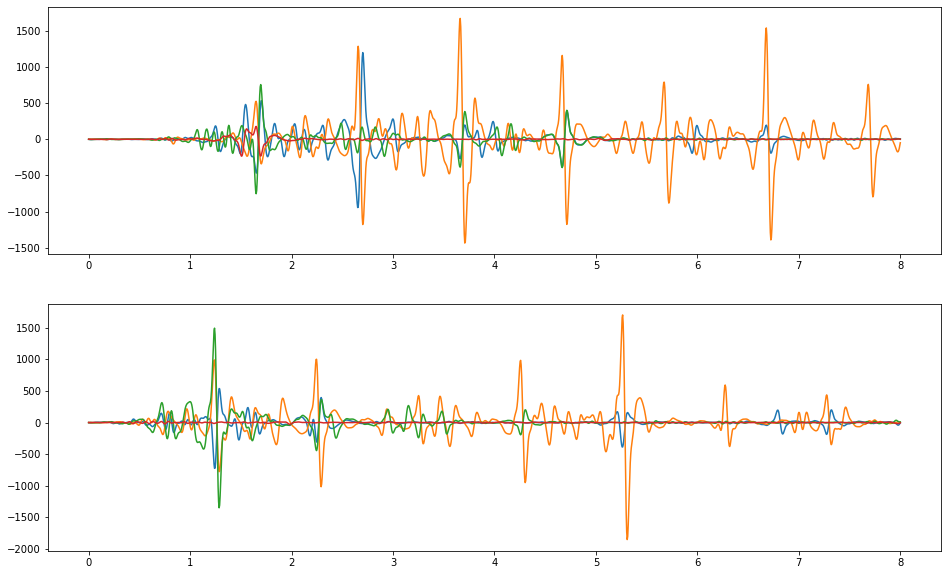

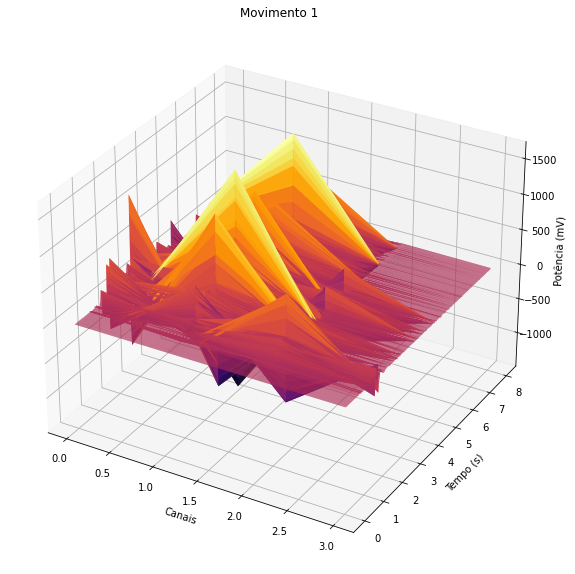

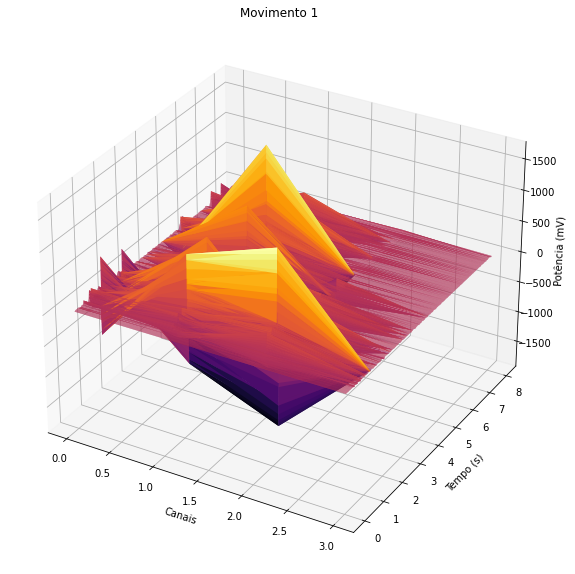

In [10]:
print(f"Comparando classe 0 do trial 1 e 2 do participante 2")
d1 = all_participants[1][0,0,0,:], all_participants[1][0,0,1,:], all_participants[1][0,0,2,:], all_participants[1][0,0,3,:]
d2 = all_participants[1][0,1,0,:], all_participants[1][0,1,1,:], all_participants[1][0,1,2,:], all_participants[1][0,1,3,:]
compareTrial2d(d1, d2)
compareTrial3d([all_participants[1], all_participants[1]], [0, 0], [0, 1])

Comparando classe 0 do trial 1 dos participantes 1 e 2


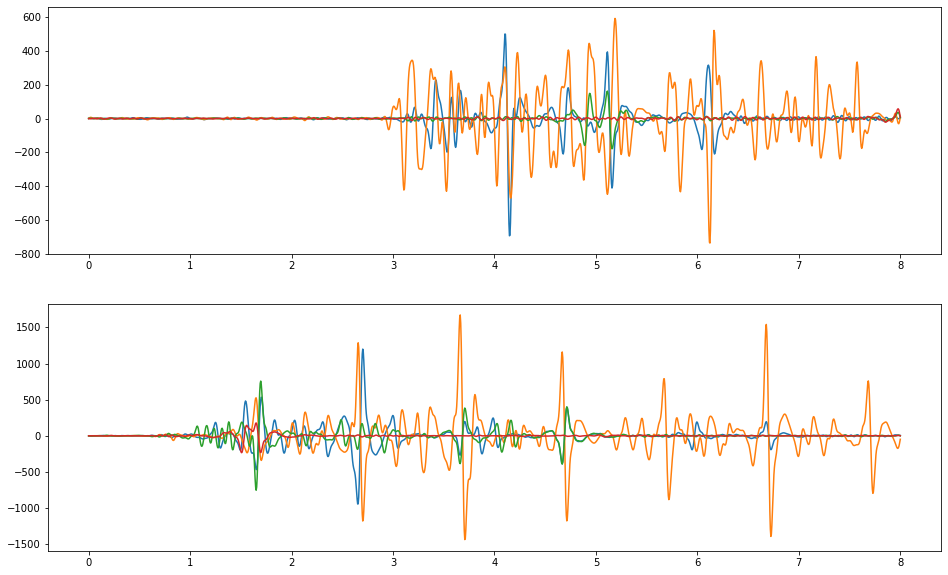

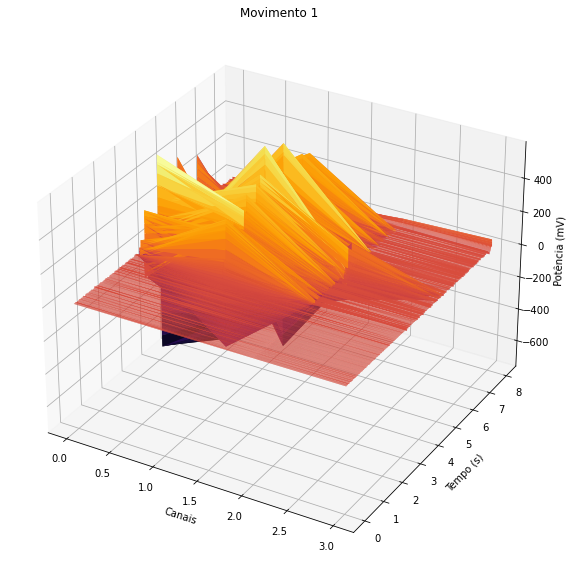

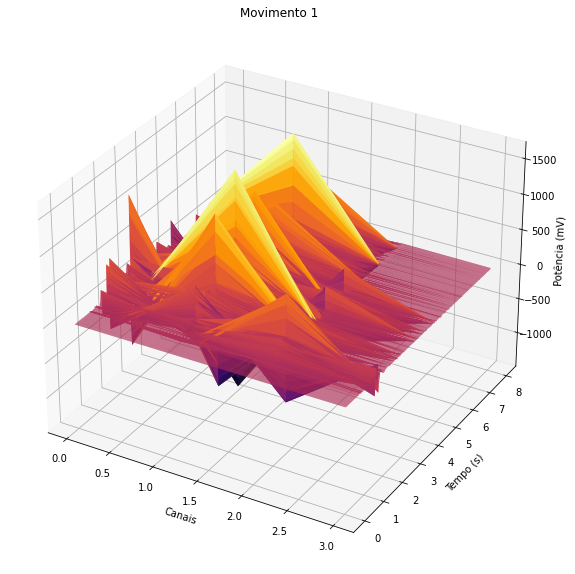

In [11]:
print (f"Comparando classe 0 do trial 1 dos participantes 1 e 2")
d1 = all_participants[0][0,0,0,:], all_participants[0][0,0,1,:], all_participants[0][0,0,2,:], all_participants[0][0,0,3,:]
d2 = all_participants[1][0,0,0,:], all_participants[1][0,0,1,:], all_participants[1][0,0,2,:], all_participants[1][0,0,3,:]
compareTrial2d(d1, d2)
compareTrial3d([all_participants[0], all_participants[1]], [0, 0], [0, 0])

Comparando classe 8 do trial 1 dos participantes 1 e 10


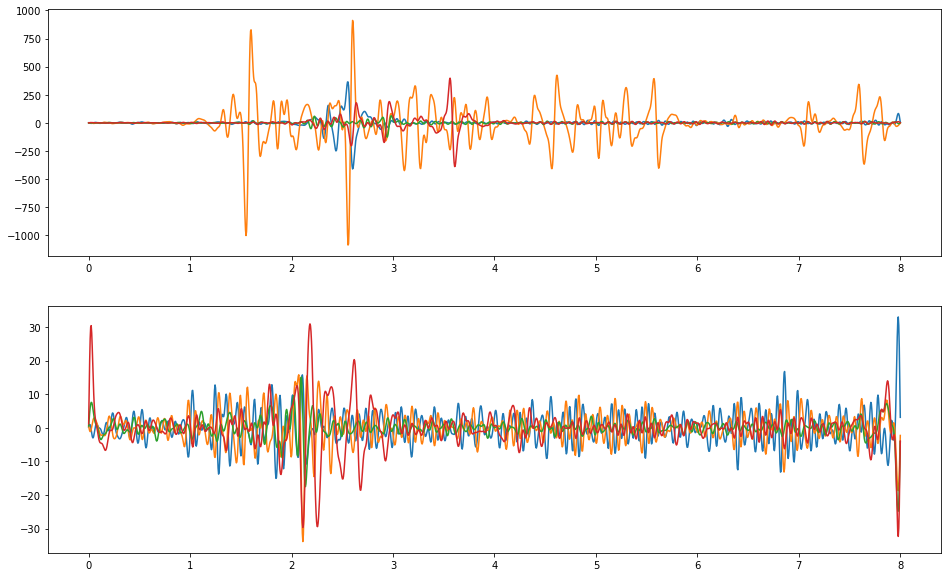

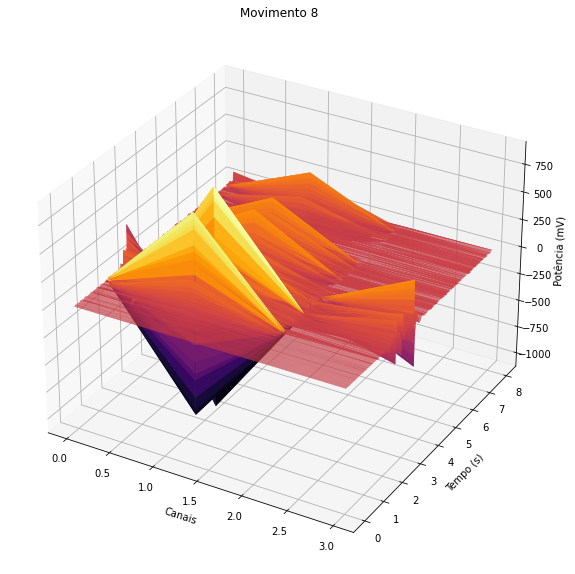

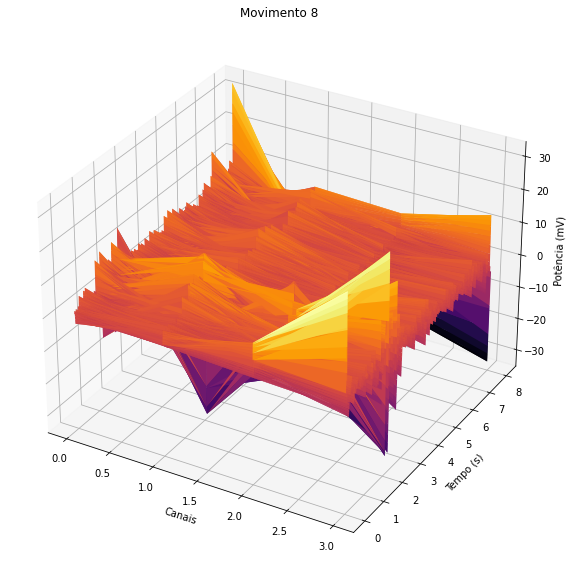

In [13]:
print (f"Comparando classe 8 do trial 1 dos participantes 1 e 10")
d1 = all_participants[0][7,0,0,:], all_participants[0][7,0,1,:], all_participants[0][7,0,2,:], all_participants[0][7,0,3,:]
d2 = all_participants[9][7,0,0,:], all_participants[9][7,0,1,:], all_participants[9][7,0,2,:], all_participants[9][7,0,3,:]
compareTrial2d(d1, d2)
compareTrial3d([all_participants[0], all_participants[9]], [7, 7], [0, 0])